In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [20]:
crime_data=pd.read_csv("D:\ExcelR\Assigments\Clustering\crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
crime_data.shape

(50, 5)

In [49]:
crime_data.rename(columns={'Unnamed: 0':'country'},inplace=True)
crime_data.head()

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [17]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [22]:
crime_data1 = crime_data.drop(labels='Unnamed: 0',axis=1)
crime_data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [32]:
std_scaler = StandardScaler()
scaled_data=std_scaler.fit_transform(crime_data1)

# KMeans clustering

In [24]:
ssc = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=2)
    km.fit(scaled_data)
    ssc.append(km.inertia_)

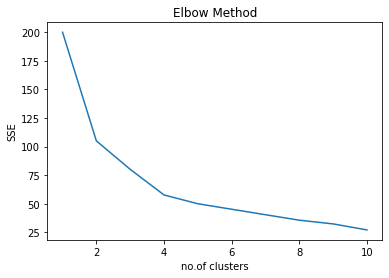

In [25]:
plt.plot(range(1,11),ssc)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('SSE')
plt.show()

In [26]:
cluster_kmean = KMeans(n_clusters=4)
cluster_kmean.fit(scaled_data)

KMeans(n_clusters=4)

In [27]:
cluster_kmean.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [28]:
cluster_kmean = cluster_kmean.labels_

In [29]:
crime_data2 = crime_data

In [30]:
crime_data2['cluster']=cluster_kmean

In [31]:
crime_data2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


## Hierarchical

In [33]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [36]:
crime_scld = pd.DataFrame(scaled_data,columns=('Murder','Assualt','Urbanpop','Rape'))
crime_scld.head()

,Murder,Assualt,Urbanpop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [37]:
import scipy.cluster.hierarchy as sch

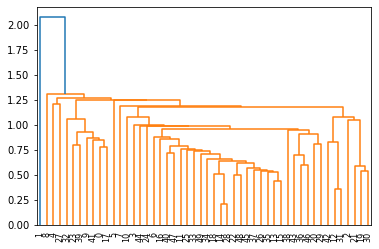

In [38]:
dendogram = sch.dendrogram(sch.linkage(crime_scld,method='single', metric='euclidean'))

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
hr = AgglomerativeClustering(n_clusters=3,linkage='single')

In [41]:
y_hr  = hr.fit_predict(crime_scld)

In [42]:
y_hr

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
cluster_hr  = pd.DataFrame({'cluster':y_hr})

In [44]:
cluster_hr

,cluster
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [50]:
crime_data2 = crime_data

In [51]:
crime_data2['cluster']=cluster_hr

In [52]:
crime_data2

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [53]:
crime_data2[crime_data2['cluster']==0]

,country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0


In [54]:
crime_data2[crime_data2['cluster']==1]

,country,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,1


In [55]:
crime_data2[crime_data2['cluster']==2]

,country,Murder,Assault,UrbanPop,Rape,cluster
8,Florida,15.4,335,80,31.9,2


## DBSCAN

In [67]:
from sklearn.cluster import DBSCAN

In [156]:
cluster_db = DBSCAN(eps=0.8,min_samples=5)

In [157]:
cluster_db.fit(crime_scld)

DBSCAN(eps=0.8)

In [158]:
cluster_db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [159]:
cluster=cluster_db.labels_

In [160]:
crime_data3 = crime_data

In [161]:
crime_data3['cluster']=cluster

In [162]:
crime_data3.corr()

,Murder,Assault,UrbanPop,Rape,cluster
Murder,1.000000,0.801873,0.069573,0.563579,-0.581585
Assault,0.801873,1.000000,0.258872,0.665241,-0.639132
UrbanPop,0.069573,0.258872,1.000000,0.411341,-0.330374
Rape,0.563579,0.665241,0.411341,1.000000,-0.542398
cluster,-0.581585,-0.639132,-0.330374,-0.542398,1.000000


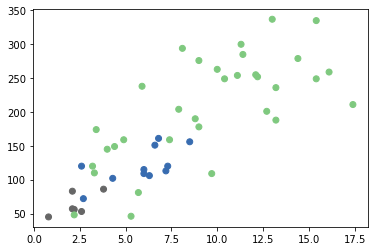

In [163]:
plt.scatter(crime_data.Murder,crime_data.Assault,c=cluster,cmap=plt.cm.Accent)

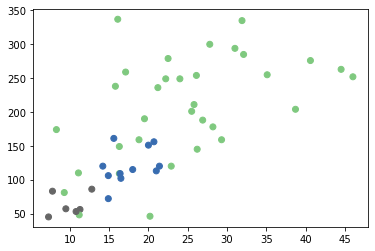

In [164]:
plt.scatter(crime_data.Rape,crime_data.Assault,c=cluster,cmap=plt.cm.Accent)